<a href="https://colab.research.google.com/github/Spyrx4/analisis_sentimen_merahputih_oneforall/blob/main/Proses_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [1153]:
df = pd.read_csv('smerahputih_oneforall.csv')

In [1154]:
df.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment


In [1155]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment
...,...,...,...,...,...
4751,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
4752,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
4753,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
4754,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [1156]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


# Pisahkan menjadi dua kolom: tanggal dan waktu
df['tanggal'] = df['publishedAt'].dt.date
df['jam'] = df['publishedAt'].dt.time

In [1157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        4756 non-null   datetime64[ns, UTC]
 1   authorDisplayName  4756 non-null   object             
 2   textDisplay        4756 non-null   object             
 3   likeCount          4756 non-null   int64              
 4   type               4756 non-null   object             
 5   tanggal            4756 non-null   object             
 6   jam                4756 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 260.2+ KB


In [1158]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

In [1159]:
df['username'] = df['authorDisplayName'].apply(clean_text)

In [1160]:
df  = pd.DataFrame(df[['tanggal','jam','username','textDisplay','likeCount']])

In [1161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4756 non-null   object
 1   jam          4756 non-null   object
 2   username     4756 non-null   object
 3   textDisplay  4756 non-null   object
 4   likeCount    4756 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 185.9+ KB


In [1162]:
# melihat data duplicate
df[df.duplicated(subset='textDisplay')]

,tanggal,jam,username,textDisplay,likeCount
47,2025-08-27,14:08:06,yoiki_kolip,Bajet miliarran grafik 80 an,0
234,2025-08-25,14:38:04,kutufilem,itu mau peramg apa gimana kok ada ak47 di gudang,0
254,2025-08-25,12:24:33,viovirza,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
323,2025-08-24,21:22:28,juragangabah-m8b,👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎,0
407,2025-08-24,07:08:29,supplyoverload,Burik,0
...,...,...,...,...,...
4624,2025-08-11,06:20:58,iujenongg,"Bakalan abis tiket bioskop nya nanti, mengalah...",1
4635,2025-08-16,10:33:31,azkaalfaizi-d4n,😂😂,0
4645,2025-08-10,05:28:21,dutsukodutsu6117,😂😂😂😂,0
4660,2025-08-09,23:18:36,agegabut,Wtf,0


In [1163]:
df.drop_duplicates(subset ="textDisplay", keep = 'first', inplace=True)

In [1164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4640 non-null   object
 1   jam          4640 non-null   object
 2   username     4640 non-null   object
 3   textDisplay  4640 non-null   object
 4   likeCount    4640 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 217.5+ KB


In [1165]:
# mencari apakah ada data kosong
df.isnull().sum()

,0
tanggal,0
jam,0
username,0
textDisplay,0
likeCount,0


In [1166]:
text = ' '.join(df['textDisplay'])

In [1167]:
from collections import Counter

tokens = text.split()
word_counts = Counter(tokens)

In [1168]:
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

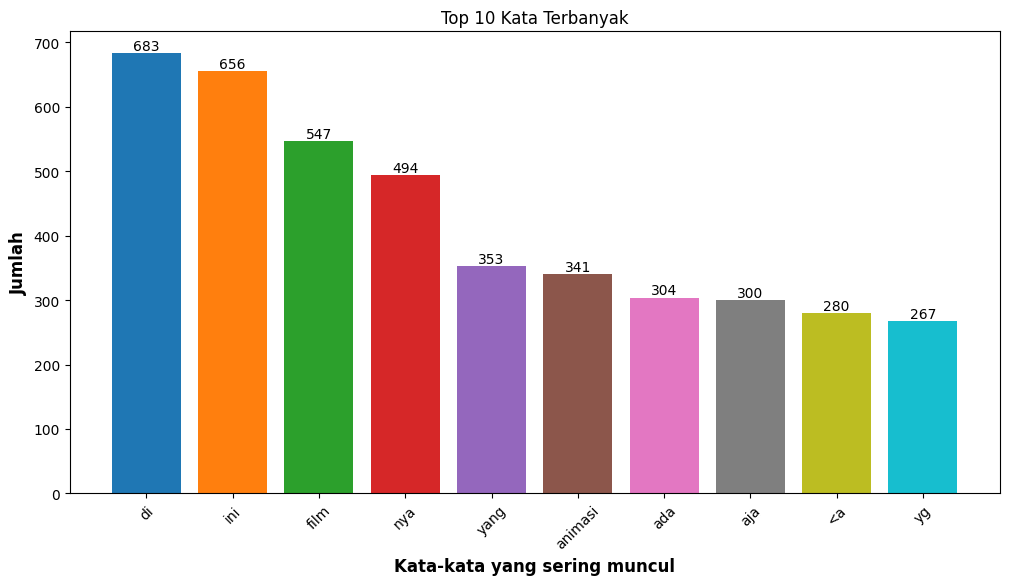

In [1169]:
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata yang sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Kata Terbanyak')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom', fontsize=10)

plt.show()

In [1170]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [1171]:
import re
import string
import nltk

In [1172]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [1173]:
def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

In [1174]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [1175]:
# fungsi menghapus emoji
def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F700-\U0001F77F" # alchemical symbols
        u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F" # Chess Symbols
        u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
        u"\U0001F004-\U0001F0CF" # Additional emoticons
        u"\U0001F1E0-\U0001F1FF" # flags
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
  else:
    return tweet

In [1176]:
# fungsi menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-0\s]', ' ', tweet)
  return tweet

In [1177]:
# # fungsi menghapus angka
# def remove_number(tweet):
#   if tweet is not None and isinstance(tweet, str):
#     tweet = re.sub(r'\d+', '', tweet)
#   return tweet

In [1178]:
# hapus hastag
def hapus_hastag(teks):
  return re.sub(r'#\w+', '', teks).strip()

In [1179]:

df['komentarBaru'] = df['textDisplay'].apply(lambda x: remove_html(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_emoji(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_symbols(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: hapus_hastag(x))
# df['komentarBaru'] = df['komentarBaru'].apply(remove_number)

df.head(10)

,tanggal,jam,username,textDisplay,likeCount,komentarBaru
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,0 apalah ada AMK M
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d h ntai is bett...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,quot berhyenti Jan lanjyut quot suaranya slay...
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank


In [1180]:
# menghitung

In [1181]:
# proses case folding
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['komentarBaru'].apply(case_folding)
df.head(10)


,tanggal,jam,username,textDisplay,likeCount,komentarBaru,case_folding
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,0 apalah ada AMK M,0 apalah ada amk m
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d h ntai is bett...,national disgrace even a daz d h ntai is bett...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE,asli buriq lebih bagus grafik free fire
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,quot berhyenti Jan lanjyut quot suaranya slay...,quot berhyenti jan lanjyut quot suaranya slay...
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...,tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank,beta buka gudang benderanya hilank


In [1182]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

    data  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount']])

In [1183]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [1185]:
# Terapkan fungsi normalisasi
df[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount', 'case_folding','normalisasi']])
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon nih masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung ya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,0 apalah ada AMK M,0,0 apalah ada amk m,0 apalah ada amk sama
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini


In [1186]:
df

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon nih masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung ya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,0 apalah ada AMK M,0,0 apalah ada amk m,0 apalah ada amk sama
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
...,...,...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Ga...,6,justanord narymankok xxi gaada trailer sih ga...,justanord narymankok xxi trailer sih gamasuk x...
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus
4753,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh,1,pengisi suara ny spa aj yahhh,pengisi suara nya spa saja ya


In [1189]:
# tokenization
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon nih masuk pawagam,"[cartoon, nih, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung ya suara monyet cok,"[burung, ya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,0 apalah ada AMK M,0,0 apalah ada amk m,0 apalah ada amk sama,"[0, apalah, ada, amk, sama]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]"


In [1190]:
# proses stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1191]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon nih masuk pawagam,"[cartoon, nih, masuk, pawagam]","[cartoon, nih, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung ya suara monyet cok,"[burung, ya, suara, monyet, cok]","[burung, ya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,0 apalah ada AMK M,0,0 apalah ada amk m,0 apalah ada amk sama,"[0, apalah, ada, amk, sama]","[0, apalah, amk]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]"


In [1192]:
# Proses steaming data
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [1193]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [1195]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon nih masuk pawagam,"[cartoon, nih, masuk, pawagam]","[cartoon, nih, masuk, pawagam]",cartoon nih masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an...",film keluar miliyaran film game android karakt...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung ya suara monyet cok,"[burung, ya, suara, monyet, cok]","[burung, ya, suara, monyet, cok]",burung ya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,0 apalah ada AMK M,0,0 apalah ada amk m,0 apalah ada amk sama,"[0, apalah, ada, amk, sama]","[0, apalah, amk]",0 apa amk
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]",jurasik park bagus


In [1196]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4640 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4640 non-null   object
 6   normalisasi       4640 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4640 non-null   object
dtypes: int64(1), object(9)
memory usage: 527.8+ KB


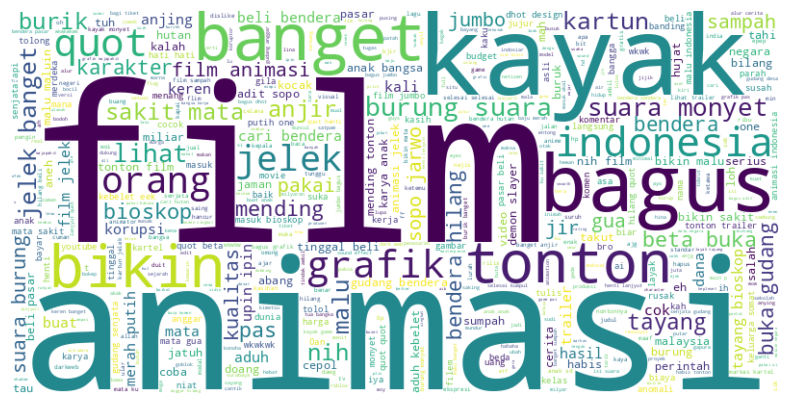

In [1199]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','kak','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga','dm'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

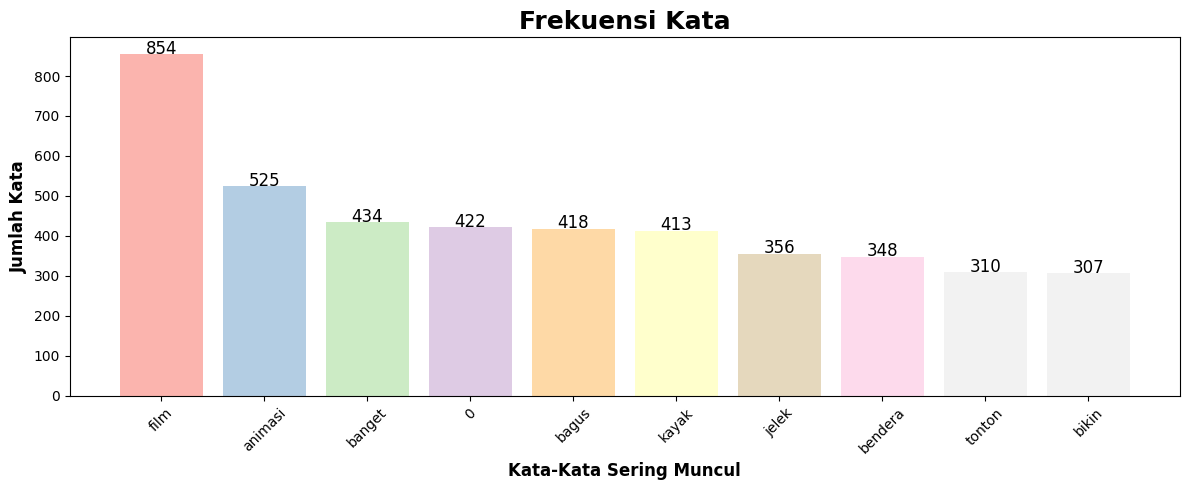

In [1201]:
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["stemming"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'kak', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','dm'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [1202]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);